In [17]:
# Importing our Utilities functions:
from utils import CautDataloaderRegular
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from scipy.stats import randint   

def RFR_grid_search(csv_path,
                     visual_data_dir,
                     visual_data_mode,
                     audio_data_dir,
                     fusion_mode,
                     visual_approach_type,
                     audio_feature_type,
                     threshold=0.5,
                     required_FPS=30,
                     input_length_in_seconds=3,
                     class_to_num_dict={"truth": 0, "lie": 1}):
    
    X_y_data = CautDataloaderRegular.get_X_y_TrainTest_Fused(csv_path,
                                                             visual_data_dir,
                                                             visual_data_mode,
                                                             audio_data_dir,
                                                             fusion_mode,
                                                             visual_approach_type=visual_approach_type,  # average or frame-based
                                                             required_FPS=required_FPS,
                                                             input_length_in_seconds=input_length_in_seconds,
                                                             audio_feature_type=audio_feature_type,  # MFCC, RMS, Chroma
                                                             class_to_num_dict=class_to_num_dict)
    
    if visual_data_mode == "OpenFace" and visual_approach_type == "average":
        X_train, y_train = X_y_data[0], X_y_data[1]
        X_test, y_test = X_y_data[2], X_y_data[3]
    else:
        X_train, y_train = X_y_data[0].reshape(-1, X_y_data[0].shape[1] * X_y_data[0].shape[2]), X_y_data[1]
        X_test, y_test = X_y_data[2].reshape(-1, X_y_data[2].shape[1] * X_y_data[2].shape[2]), X_y_data[3]
        X_train[np.isnan(X_train)] = 0
        X_test[np.isnan(X_test)] = 0
    
    params = {
        'n_estimators': randint(50,500),
        'max_depth': randint(1,20)
    }
    rfc = RandomForestClassifier()
    rand_search = RandomizedSearchCV(rfc, 
                                 param_distributions = params, 
                                 n_iter=5, 
                                 cv=5)
    rand_search.fit(X_train, y_train)
    best_rf = rand_search.best_estimator_
    return best_rf.get_params()['max_depth'], best_rf.get_params()['n_estimators']
        
def RFR_Model(csv_path,
               visual_data_dir,
               visual_data_mode,
               audio_data_dir,
               # coord_selection,
               fusion_mode,
               visual_approach_type,  # average or frame-based
               audio_feature_type,  # MFCC, RMS, Chroma
               threshold,
               required_FPS,
               input_length_in_seconds,
               class_to_num_dict,
               train_verbose):

    X_y_data = CautDataloaderRegular.get_X_y_TrainTest_Fused(csv_path,
                                                             visual_data_dir,
                                                             visual_data_mode,
                                                             audio_data_dir,
                                                             # coord_selection,
                                                             fusion_mode,
                                                             visual_approach_type=visual_approach_type,  # average or frame-based
                                                             required_FPS=required_FPS,
                                                             input_length_in_seconds=input_length_in_seconds,
                                                             audio_feature_type=audio_feature_type,  # MFCC, RMS, Chroma
                                                             class_to_num_dict=class_to_num_dict,
                                                             verbose=train_verbose)
    
    if visual_data_mode == "OpenFace" and visual_approach_type == "average":
        X_train, y_train = X_y_data[0], X_y_data[1]
        X_test, y_test = X_y_data[2], X_y_data[3]
    else:
        X_train, y_train = X_y_data[0].reshape(-1, X_y_data[0].shape[1] * X_y_data[0].shape[2]), X_y_data[1]
        X_test, y_test = X_y_data[2].reshape(-1, X_y_data[2].shape[1] * X_y_data[2].shape[2]), X_y_data[3]
        X_train[np.isnan(X_train)] = 0
        X_test[np.isnan(X_test)] = 0
    
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    
    depth, estimators = RFR_grid_search(csv_path,
                                        visual_data_dir,
                                        visual_data_mode,
                                        audio_data_dir,
                                        fusion_mode,
                                        visual_approach_type=visual_approach_type,  # average or frame-based
                                        required_FPS=required_FPS,
                                        input_length_in_seconds=input_length_in_seconds,
                                        audio_feature_type=audio_feature_type,  # MFCC, RMS, Chroma
                                        class_to_num_dict=class_to_num_dict)
    
    rf = RandomForestClassifier(n_estimators=estimators, max_depth=depth)
    
    # fit the model:
    rf.fit(X_train, y_train)
    
    # predict on test data:
    y_pred = rf.predict(X_test)
    
    # get metrics (accuracy, precision, recall)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Precision", precision)
    print("Recall", recall)
    
    # show confusion matrix
    CautDataloaderRegular.plot_confusion_matrix(y_test, y_pred)

# OpenFace (Sequential):

audio_data_dir updated to: C:\Work\606Capstone\Video_chunks\audio_features\MFCC_audio_features

Selected csv_path: C:\Work\606Capstone\Video_chunks\CSV\
(520, 4230) (520,) (222, 4230) (222,)
audio_data_dir updated to: C:\Work\606Capstone\Video_chunks\audio_features\MFCC_audio_features

Selected csv_path: C:\Work\606Capstone\Video_chunks\CSV\
Processed 100 / 520
  - Sample shape & label:
    - X_data: (90, 47)
    - y_data: 0
Processed 200 / 520
  - Sample shape & label:
    - X_data: (90, 47)
    - y_data: 0
Processed 300 / 520
  - Sample shape & label:
    - X_data: (90, 47)
    - y_data: 1
Processed 400 / 520
  - Sample shape & label:
    - X_data: (90, 47)
    - y_data: 0
Processed 500 / 520
  - Sample shape & label:
    - X_data: (90, 47)
    - y_data: 1
Processed 100 / 223
  - Sample shape & label:
    - X_data: (90, 47)
    - y_data: 1
Processed 200 / 223
  - Sample shape & label:
    - X_data: (90, 47)
    - y_data: 0
----------------------------
Gathered data shapes:
X_train.sh

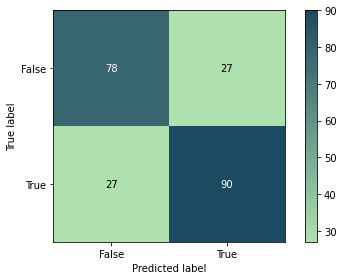

---------------------------------------------------------------

Metrics Rates:
     - True Positive            : 90
     - False Positive           : 27
     - True Negative            : 78
     - False Negative           : 27
     - True Positive Rate       :  0.7692307692307693
     - True Negative Rate       :  0.7428571428571429
     - Positive Predictive Value:  0.7692307692307693
     - Negative predictive value:  0.7428571428571429
     - False Positive Rate      :  0.2571428571428571
     - False Negative Rate      :  0.23076923076923078
     - False Discovery Rate     :  0.23076923076923078


In [18]:
RFR_Model(csv_path="C:\\Work\\606Capstone\\Video_chunks\\CSV\\",
           visual_data_dir="C:\\Work\\606Capstone\\Video_chunks\\Excel\\",
           visual_data_mode="OpenFace",
           audio_data_dir="C:\\Work\\606Capstone\\Video_chunks\\audio_features\\",
           # coord_selection,
           fusion_mode="+",
           visual_approach_type="sequential",  # average or frame-based
           audio_feature_type="MFCC",  # MFCC, RMS, Chroma
           threshold=0.5,
           required_FPS=30,
           input_length_in_seconds=3,
           class_to_num_dict={"truth": 0, "lie": 1},
           train_verbose=False)

# OpenFace (Average):

audio_data_dir updated to: C:\Work\606Capstone\Video_chunks\audio_features\MFCC_audio_features

Selected csv_path: C:\Work\606Capstone\Video_chunks\CSV\
Video failed to be processed by OpenFace. Videoname=trial_truth_025_007. Skipping...
Video failed to be processed by OpenFace. Videoname=trial_lie_053_007. Skipping...
Video failed to be processed by OpenFace. Videoname=trial_lie_053_002. Skipping...
Video failed to be processed by OpenFace. Videoname=trial_truth_025_008. Skipping...
Video failed to be processed by OpenFace. Videoname=trial_lie_053_006. Skipping...
Video failed to be processed by OpenFace. Videoname=trial_lie_015_008. Skipping...
(518, 47) (518,) (219, 47) (219,)
audio_data_dir updated to: C:\Work\606Capstone\Video_chunks\audio_features\MFCC_audio_features

Selected csv_path: C:\Work\606Capstone\Video_chunks\CSV\
Processed 100 / 520
  - Sample shape & label:
    - X_data: (47,)
    - y_data: 0
Processed 200 / 520
  - Sample shape & label:
    - X_data: (47,)
    - y_da

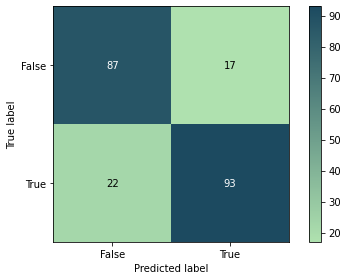

---------------------------------------------------------------

Metrics Rates:
     - True Positive            : 93
     - False Positive           : 17
     - True Negative            : 87
     - False Negative           : 22
     - True Positive Rate       :  0.808695652173913
     - True Negative Rate       :  0.8365384615384616
     - Positive Predictive Value:  0.8454545454545455
     - Negative predictive value:  0.7981651376146789
     - False Positive Rate      :  0.16346153846153846
     - False Negative Rate      :  0.19130434782608696
     - False Discovery Rate     :  0.15454545454545454


In [19]:
RFR_Model(csv_path="C:\\Work\\606Capstone\\Video_chunks\\CSV\\",
           visual_data_dir="C:\\Work\\606Capstone\\Video_chunks\\Excel\\",
           visual_data_mode="OpenFace",
           audio_data_dir="C:\\Work\\606Capstone\\Video_chunks\\audio_features\\",
           # coord_selection,
           fusion_mode="+",
           visual_approach_type="average",  # average or frame-based
           audio_feature_type="MFCC",  # MFCC, RMS, Chroma
           threshold=0.5,
           required_FPS=30,
           input_length_in_seconds=3,
           class_to_num_dict={"truth": 0, "lie": 1},
           train_verbose=False)

# MediaPipe (Sequential):

audio_data_dir updated to: C:\Work\606Capstone\Video_chunks\audio_features\MFCC_audio_features

Selected csv_path: C:\Work\606Capstone\Video_chunks\CSV\
(520, 5040) (520,) (223, 5040) (223,)
audio_data_dir updated to: C:\Work\606Capstone\Video_chunks\audio_features\MFCC_audio_features

Selected csv_path: C:\Work\606Capstone\Video_chunks\CSV\
Processed 100 / 520
  - Sample shape & label:
    - X_data: (90, 56)
    - y_data: 0
Processed 200 / 520
  - Sample shape & label:
    - X_data: (90, 56)
    - y_data: 0
Processed 300 / 520
  - Sample shape & label:
    - X_data: (90, 56)
    - y_data: 1
Processed 400 / 520
  - Sample shape & label:
    - X_data: (90, 56)
    - y_data: 0
Processed 500 / 520
  - Sample shape & label:
    - X_data: (90, 56)
    - y_data: 1
Processed 100 / 223
  - Sample shape & label:
    - X_data: (90, 56)
    - y_data: 1
Processed 200 / 223
  - Sample shape & label:
    - X_data: (90, 56)
    - y_data: 1
----------------------------
Gathered data shapes:
X_train.sh

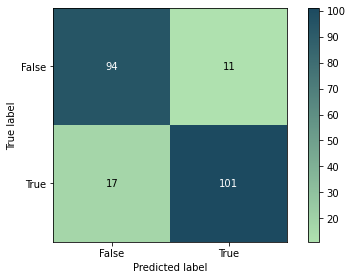

---------------------------------------------------------------

Metrics Rates:
     - True Positive            : 101
     - False Positive           : 11
     - True Negative            : 94
     - False Negative           : 17
     - True Positive Rate       :  0.8559322033898306
     - True Negative Rate       :  0.8952380952380953
     - Positive Predictive Value:  0.9017857142857143
     - Negative predictive value:  0.8468468468468469
     - False Positive Rate      :  0.10476190476190476
     - False Negative Rate      :  0.1440677966101695
     - False Discovery Rate     :  0.09821428571428571


In [20]:
RFR_Model(csv_path="C:\\Work\\606Capstone\\Video_chunks\\CSV\\",
           visual_data_dir="C:\\Work\\606Capstone\\Video_chunks\\MediaPipe\\",
           visual_data_mode="MediaPipe",
           audio_data_dir="C:\\Work\\606Capstone\\Video_chunks\\audio_features\\",
           # coord_selection,
           fusion_mode="+",
           visual_approach_type="sequential",  # average or frame-based
           audio_feature_type="MFCC",  # MFCC, RMS, Chroma
           threshold=0.5,
           required_FPS=30,
           input_length_in_seconds=3,
           class_to_num_dict={"truth": 0, "lie": 1},
           train_verbose=False)